# Q4: Gridsynth [2 Points]
Gridsynth is the state-of-the-art (ancilla-free, deterministic) synthesis algorithm to approximate Rz gates with Clifford + T. Gridsynth leverages insights from number theory to achieve optimal or near-optimal approximations for any desired error threshold $\epsilon$. By optimal, we mean the saturation of the T count lower bound given an $\epsilon$, which you will explore in Part A.

In [1]:
!pip install pygridsynth numpy scipy matplotlib

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.7/47.7 KB 161.1 kB/s eta 0:00:00a 0:00:01


## Part A
To approximate an Rz to error $\epsilon$ (gridsynth uses the operator norm as the error metric, which is very close to the distance metric we used in Q3), we need at least $a\log_2 \frac{1}{\epsilon}+b$ T gates in the typical case, where $a$ and $b$ are two real numbers. In this part, you will use a Python implementation of gridsynth to synthesize random Rz gates at different $\epsilon$ to fit $a$ and $b$.

In [ ]:
from pygridsynth import gridsynth_gates
import numpy as np

epsilons = [10**(-i) for i in range(2, 8)]
num_angles = 100
angles = np.random.default_rng(42).uniform(0, 2 * np.pi, size=num_angles)
t_counts = []
for eps in epsilons:
    current_t_counts = []
    for angle in angles:
        gates = gridsynth_gates(angle, epsilon=eps)
        t_count = gates.count('T')
        current_t_counts.append(t_count)
    t_counts.append(current_t_counts)

t_counts = np.array(t_counts)

a = 3.0797948812456637  b = -1.6388571412511375


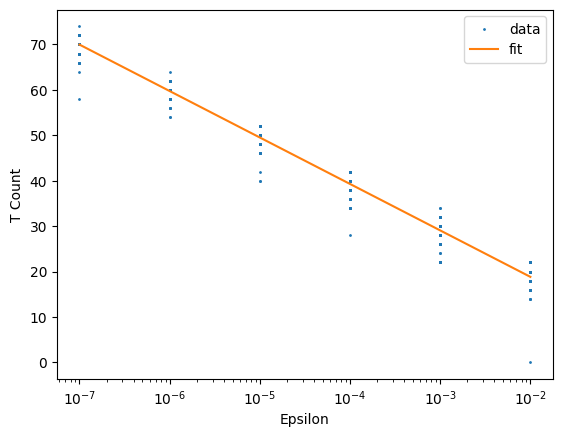

In [ ]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def fitting_func(x, a, b):
    return a * np.log2(1 / x) + b

epsilons_repeated = np.repeat(epsilons, num_angles)
t_counts_flat = np.array(t_counts).reshape(-1)

popt, pcov = curve_fit(fitting_func, epsilons_repeated, t_counts_flat, p0=(1, 0))
print(f"a = {popt[0]}  b = {popt[1]}")

x_plot = np.logspace(np.log10(min(epsilons)), np.log10(max(epsilons)), 100)
y_plot = fitting_func(x_plot, *popt)

plt.scatter(epsilons_repeated, t_counts_flat, s=1, label="data", c="tab:blue")
plt.semilogx(x_plot, y_plot, label="fit", color="tab:orange")
plt.xlabel("Epsilon")
plt.ylabel("T Count")
plt.legend()
plt.show()

## Part B Overhead of FTQC
Now let's estimate the number of T gates needed for executing a QAOA circuit fault-tolerantly. Since the only source of non-Cliffordness in QAOA is the axial rotations, we first count the number of $R_z$ ($R_x = HR_zH$) gates we need to synthesize in a 10-layer QAOA solving a MaxCut problem with a 100-node 3-regular graph. Then we multiply the number of $R_z$ gates by the rough number of $T$ gates we estimated in Part A for a given $\epsilon$.

> Hint: In a 3-regular graph, each node has 3 edges. How many edges are in the graph? How many Pauli ZZ terms are in the Hamiltonian? How many $R_z$ gates are needed for each ZZ term?

This is a hand-derivation math problem, but feel free to get inspirations or verify your findings by coding.

#### (1) What is the number of $R_z$ gates we need to synthesize in a 10-layer QAOA solving a MaxCut problem with a 100-node 3-regular graph? Remember the $R_x$ gates also need to be transpiled to $R_z$ gates to synthesize.

**Solution:**

Todo

#### (2) To set the synthesis error threshold $\epsilon$, we use a very naive approach here that simply divides the circuit-level error threshold by the number of gates to be synthesized. For a circuit-level error threshold of 0.01, what is the $\epsilon$ for each individual $R_z$ gate? What is the corresponding T gate count needed in total?

> Remark: In error correction codes, (logical) T gates are typically hundreds of times more costly to implement compared to physical gates. This should give you an idea of the overhead of FTQC.

**Solution:**

Todo